In [106]:
# Импорт библиотек
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Импорт sklearn
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.inspection import permutation_importance
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression

# Импорт TensorFlow и Keras
from tensorflow import keras
from tensorflow.keras import layers
from keras.optimizers import Adam

# Импорт Seaborn
import seaborn as sns

In [107]:
# Загружаем данные и выводим первые 5 строк

df = pd.read_csv('/kaggle/input/dataset-songs/dataset.csv')
df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [108]:
# Выведем общую информацию

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

In [109]:
# Заменяем пропуски в категориальных столбцах на 'unknown' для обработки недостающих данных

df = df.fillna({'artists': 'unknown', 'album_name': 'unknown', 'track_name': 'unknown'})

In [110]:
# Удалим ненужные для дальнейшего анализа колонки

df = df.drop(columns=['Unnamed: 0', 'track_id', 'track_name'])

# Проверим на наличие пропусков
df.isnull().sum()

artists             0
album_name          0
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [111]:
# Заменим все бесконечные значения на NaN
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Удалим строки с NaN значениями
df.dropna(inplace=True)

# Проверим
print(df.isnull().sum())
print((df == np.inf).sum())
print((df == -np.inf).sum())

artists             0
album_name          0
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64
artists             0
album_name          0
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64
artists             0
album_name          0
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudne

In [112]:
# Преобразуем длительность из милисекунд в минуты 
# Это необходимо для удобства анализа и уменьшения влияния на модель (например, для линейной регрессии)

df['duration_minutes'] = (df['duration_ms'] / 60000).round(2)

# Удалим ненужный столбец
df.drop('duration_ms', axis=1, inplace=True)

# Просмотрим значения в новом столбце
df['duration_minutes']

0         3.84
1         2.49
2         3.51
3         3.37
4         3.31
          ... 
113995    6.42
113996    6.42
113997    4.52
113998    4.73
113999    4.03
Name: duration_minutes, Length: 114000, dtype: float64

In [113]:
## Анализ данных

In [114]:
# Выделим числовые и категориальные признаки
numerical_features = df.select_dtypes(include=['number','float64','int64']).columns.tolist()
categorical_features = df.select_dtypes(include=['object','category']).columns.tolist()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


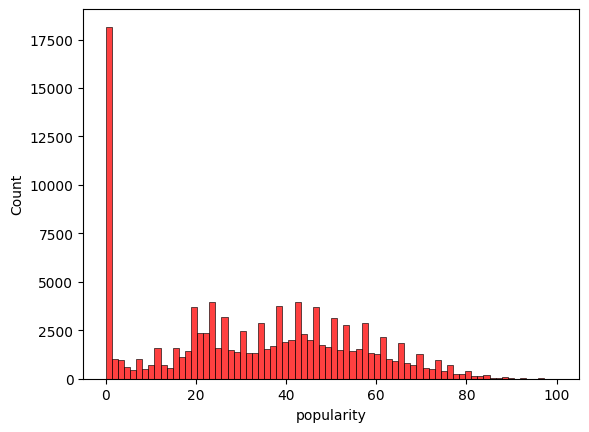

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


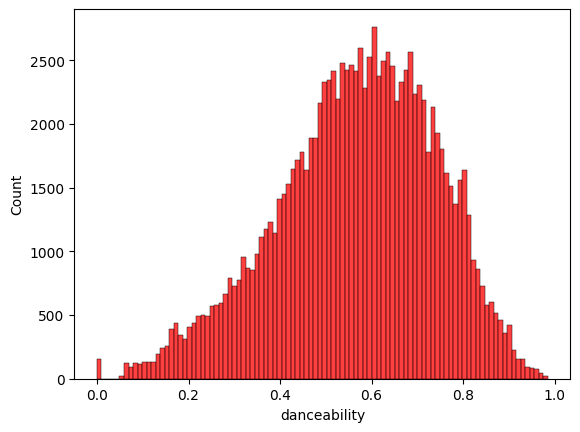

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


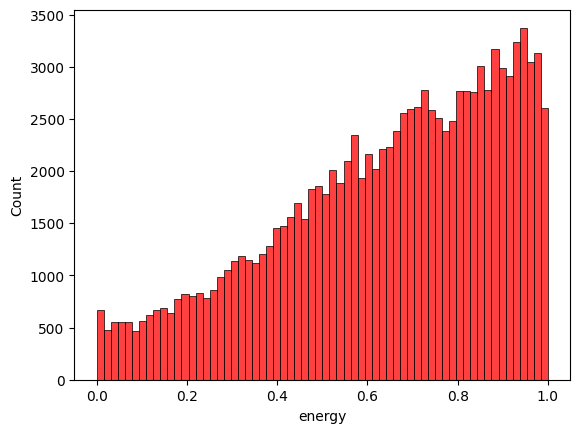

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


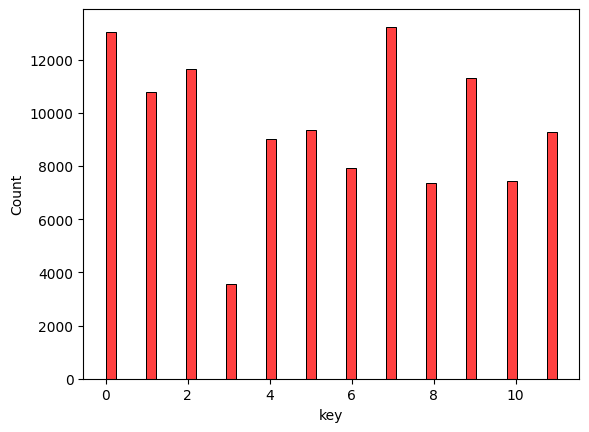

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


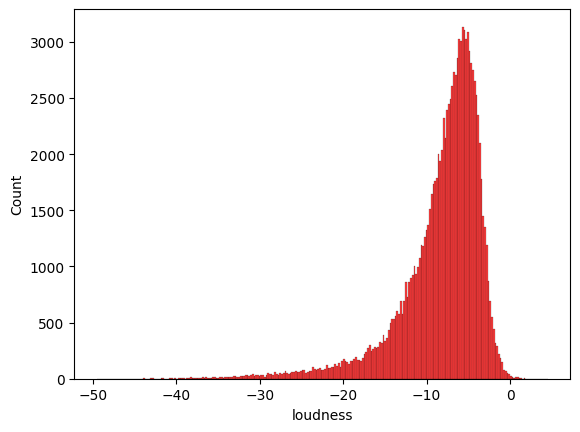

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


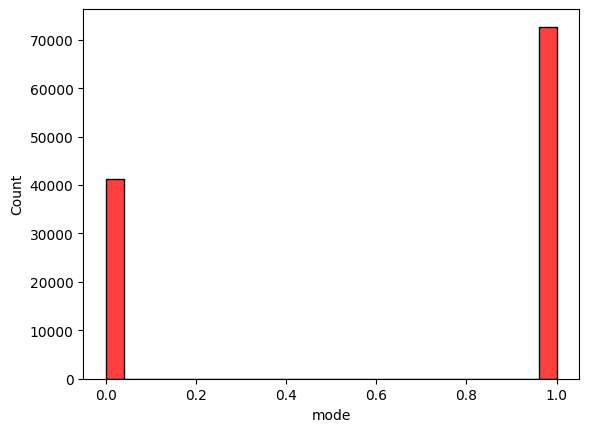

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


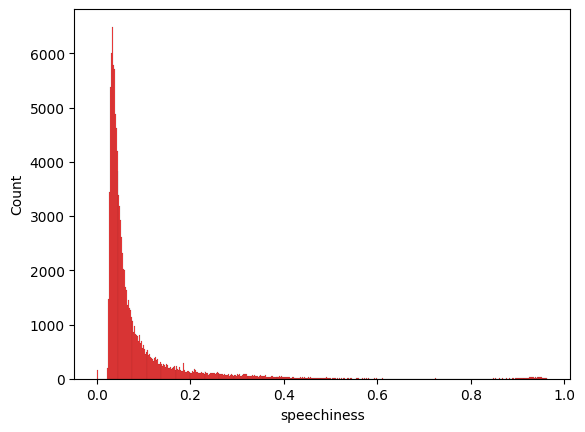

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


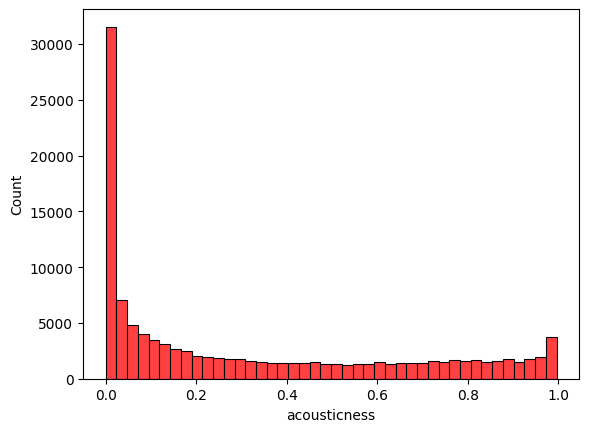

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


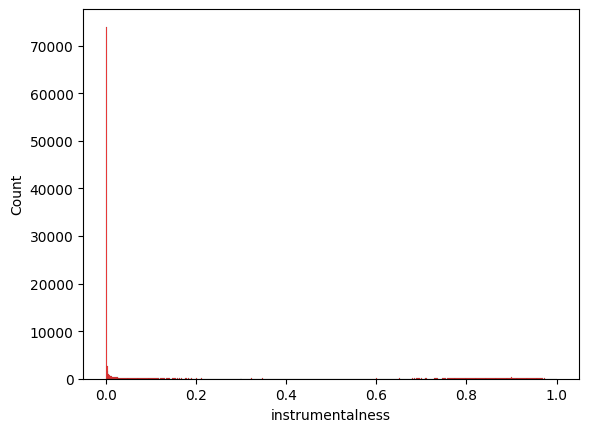

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


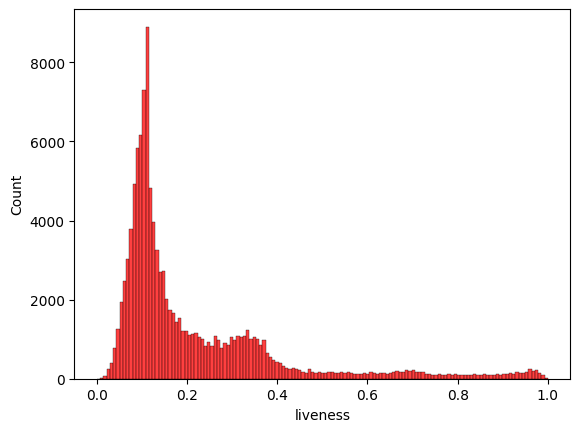

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


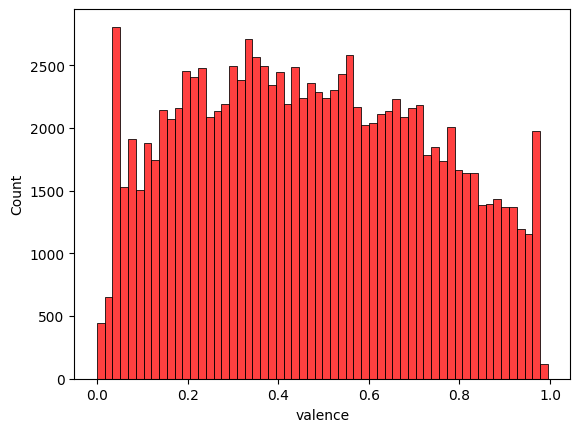

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


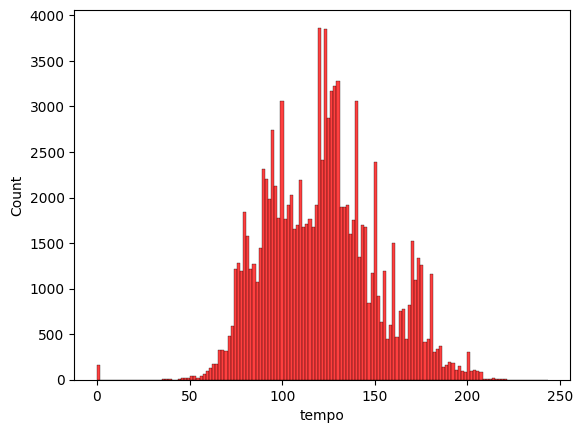

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


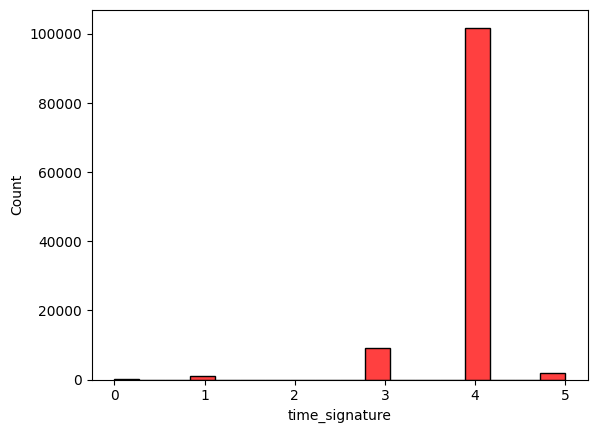

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


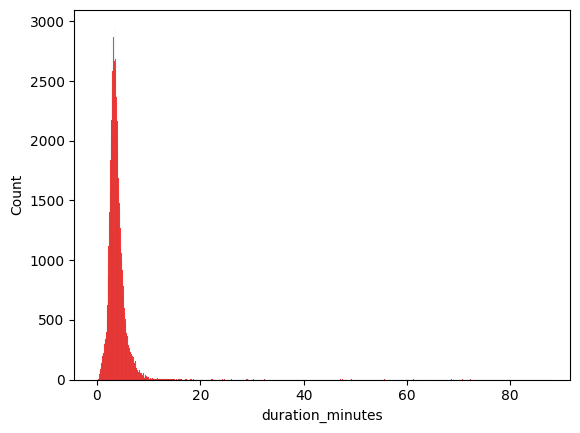

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


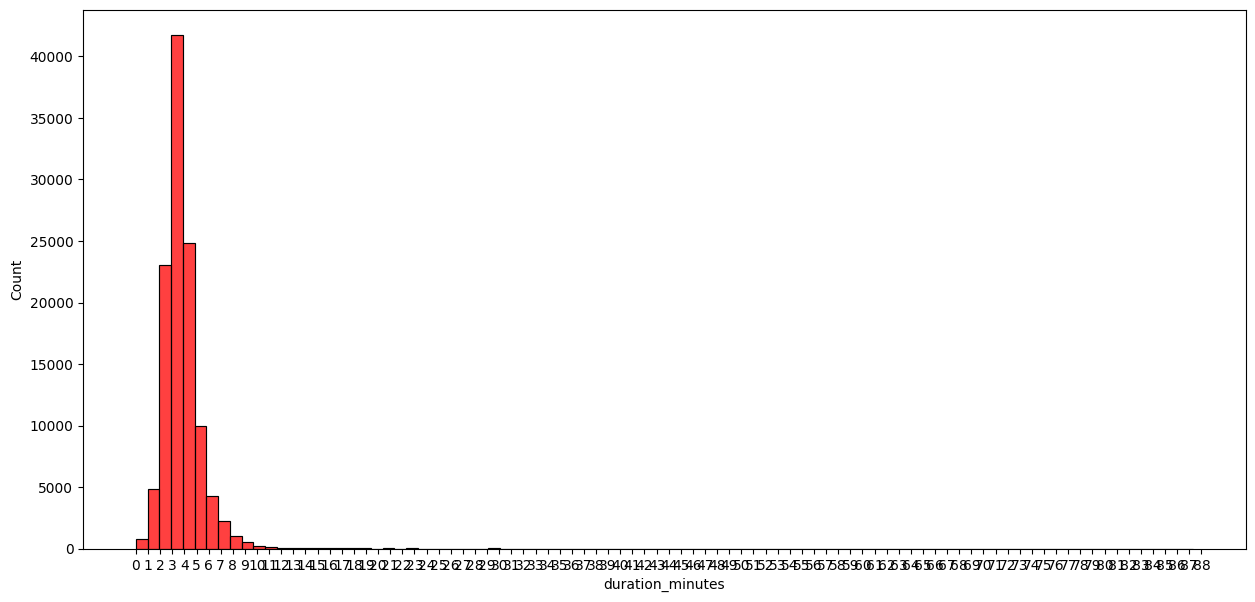

In [115]:
# Изучим распределение данных
# Построим гистограммы для числовых признаков

for x in numerical_features:
    plt.figsize=(12, 10)
    sns.histplot(df[x], color='red')
    plt.show()

# Построим отдельно гистограмму для длительности песен
plt.figure(figsize=(15, 7))
sns.histplot(df['duration_minutes'], bins=90, kde=False, color='red')

plt.xticks(np.arange(0, df['duration_minutes'].max() + 1, step=1))

plt.show()


### Анализ распределения признаков:

- **Popularity**: значения от 0.0 до 100.0. Большинство треков имеют низкие значения популярности

- **Danceability**: значения лежат в диапазоне от 0.0 до 1.0. Большинство песен имеют значения близкие к 0.6. Это говорит о том, что большинство песен вызывают желание потанцевать

- **Energy**: значения лежат в диапазоне от 0.0 до 1.0. Распределение смещено вправо с пиком около 0.7. Это говорит о том, что треки в основном обладают средней или высокой энергичностью

- **Key**: значения от 0 до 12. Это шкала для музыкальных тональностей. Распределение довольно равномерное, что может говорить о разнообразии тональностей в треках

- **Loudness**: значения -60 до 0 дБ, с большинством треков в районе -10 дБ

- **Mode**: два значения: 0 (минор) и 1 (мажор). Большинство треков находятся в мажоре (1), что характерно для популярной музыки с оптимистичным настроением

- **Speechiness**: значения от 0.0 до 1.0, с большинством песен, имеющих показатель ниже примерно 0.2. Это означает, что большинство песен не имеют значительного количества слов

- **Acousicness**: значения лежат в диапазоне от 0.0 до 1.0. Большинство треков имеют низкие значения (менее 0.2), что говорит о преобладании студийных композиций с низкой долей акустики

- **Instrumentalness**: значения лежат в диапазоне от 0.0 до 1.0. Низкие значения указывают на присутствие вокала, а высокие - на инструментальные композиции. Большинство песен имеют значения близкие к 0, что говорит о преобладании песен с вокалом

- **Liveness**: значения от 0.0 до 1.0. Высокие значения означают наличие аудитории, что типично для живых записей. Большинство песен имеют значения близкие к 0, что указывает на преобладание студийных записей

- **Valence**: значения от 0.0 до 1.0. Большинство песен имеют значение эмоциональной окраски около 0.5, что говорит об относительном балансе между грустными и позитивными песнями 

- **Tempo**: значения лежат в диапазоне от 0 до примерно 230. В основном темп песен находится в диапазоне от 100 ударов в минуту с пиком в примерно 130 BPM

- **Time_signature**: значения от 1 до 5. Большинство песен имеют ритмический размер 4

- **Duration_minutes**: значения лежат в диапазоне от 0 до 10 минут. Большинство песен имеют длительность около 3–4 минут, но стоит обратить внимание на наличие очень длинных треков


### Общий вывод:
Датасет представляет собой набор популярных студийных треков, преимущественно с высокой танцевальностью, умеренной энергией и преобладанием вокала. Музыка в основном создается в мажорных тональностях с темпом около 100–130 BPM и продолжительностью около 3–4 минут. Большинство треков имеют низкий уровень популярности, что может говорить о большом количестве малоизвестных песен

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


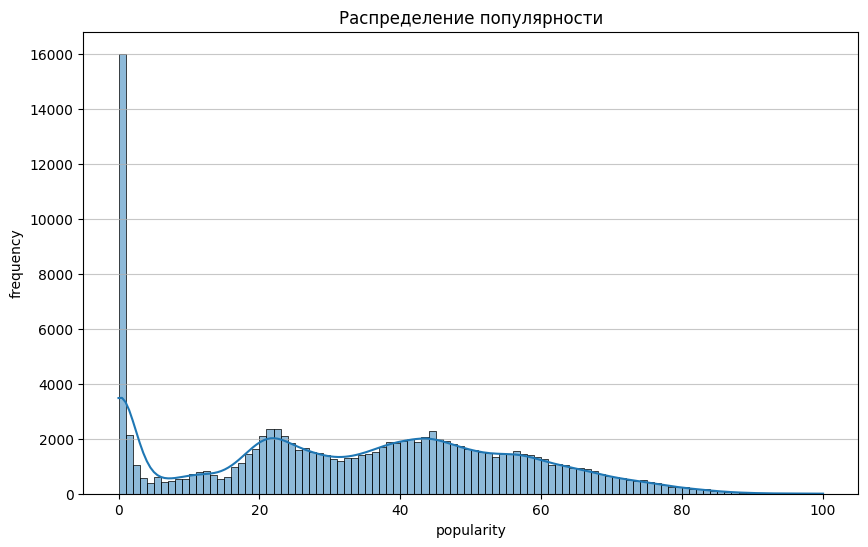

In [116]:
# Построим гистограмму для распределения популярности треков с наложением графика плотности, чтобы подробнее изучить признак

plt.figure(figsize=(10, 6))
sns.histplot(df['popularity'], bins=100, kde=True)
plt.title('Распределение популярности')
plt.xlabel('popularity')
plt.ylabel('frequency')
plt.grid(axis='y', alpha=0.7)
plt.show()

Популярные треки: 954
Непопулярные треки: 32067
                  Популярные треки  Непопулярные треки
popularity               84.614256            5.247825
danceability              0.658111            0.577119
energy                    0.679426            0.638868
key                       5.388889            5.369975
loudness                 -6.127299           -8.405016
mode                      0.588050            0.628559
speechiness               0.081458            0.081807
acousticness              0.188535            0.301460
instrumentalness          0.026476            0.203697
liveness                  0.168345            0.190443
valence                   0.507980            0.486613
tempo                   118.426755          121.305095
time_signature            3.947589            3.897402
duration_minutes          3.527180            3.798716


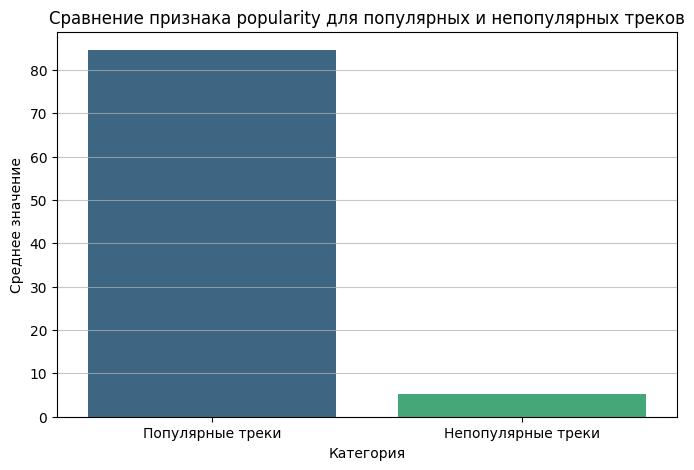

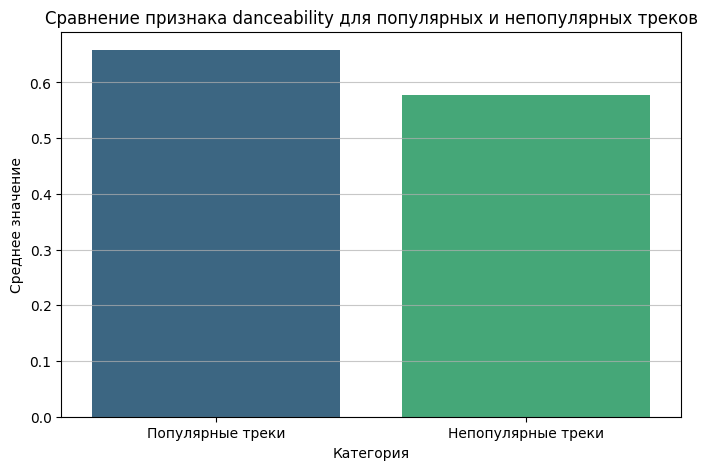

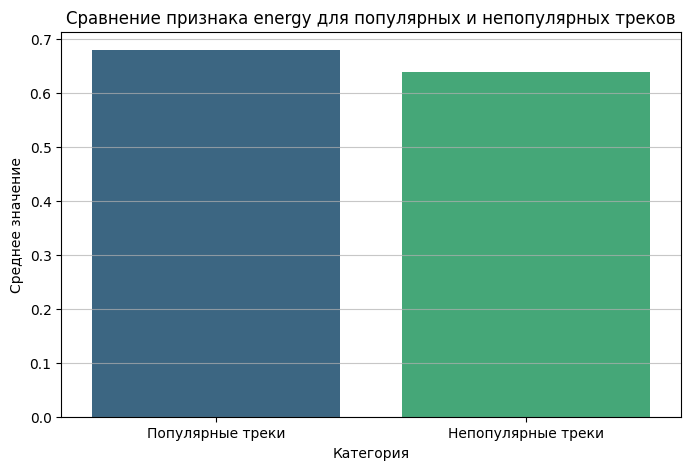

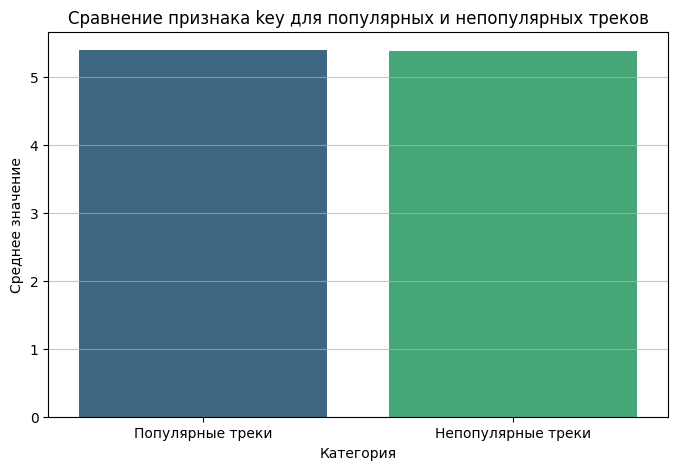

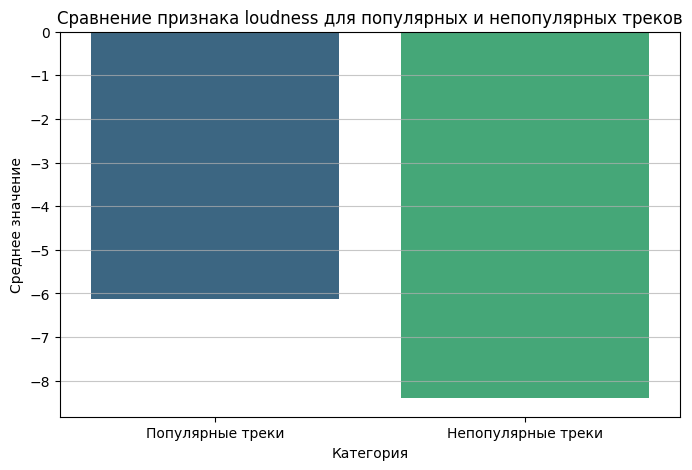

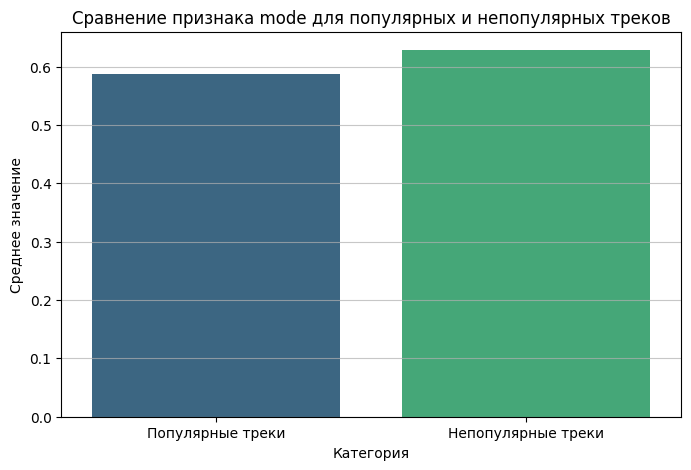

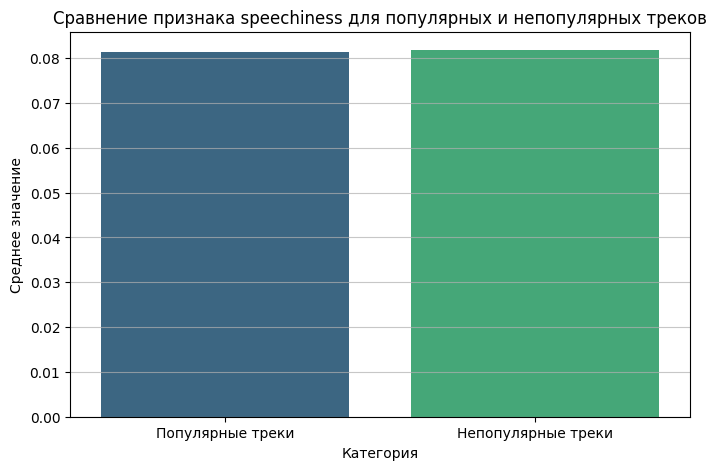

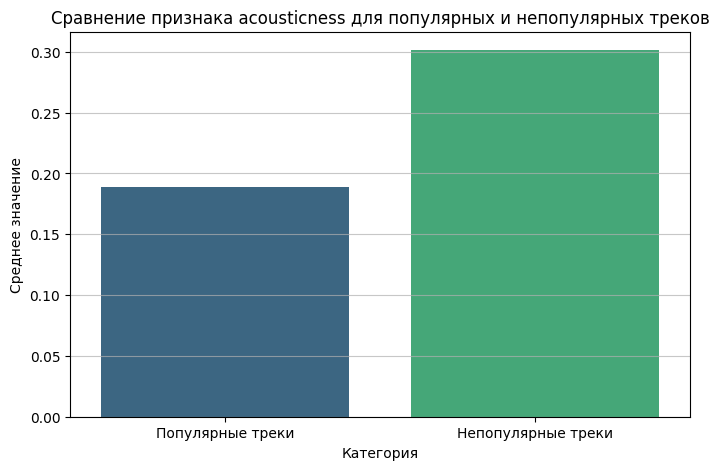

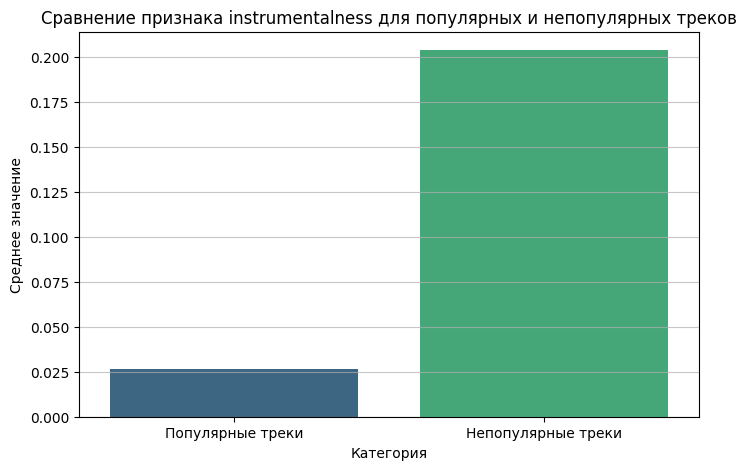

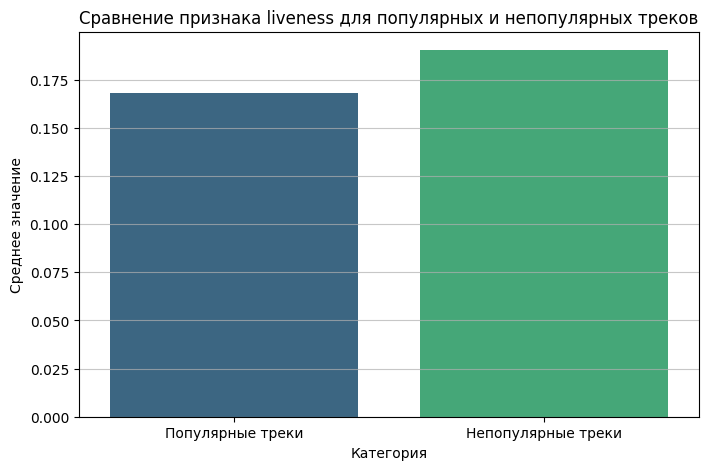

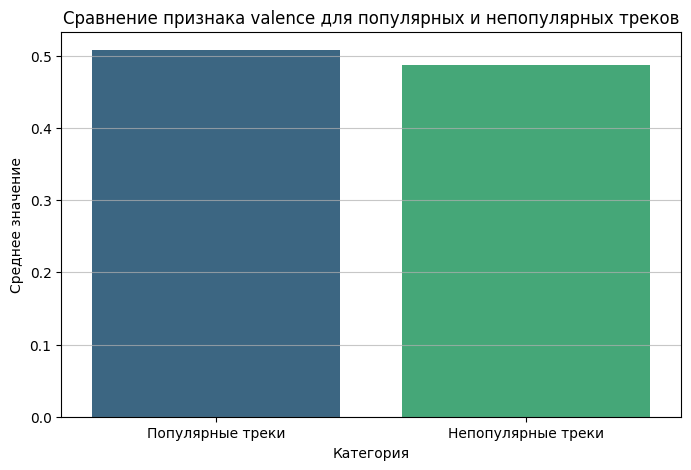

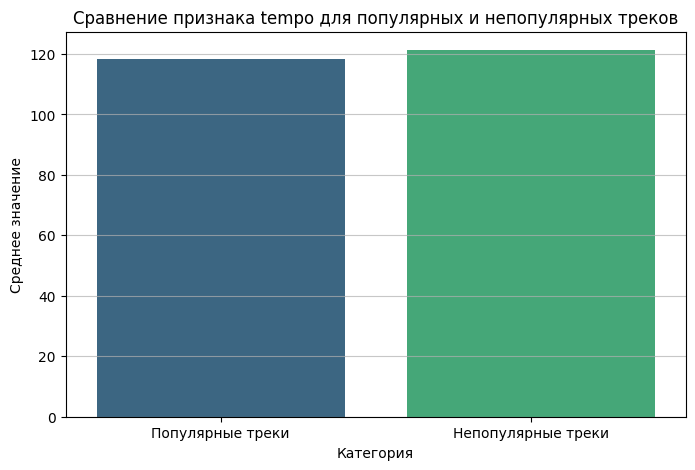

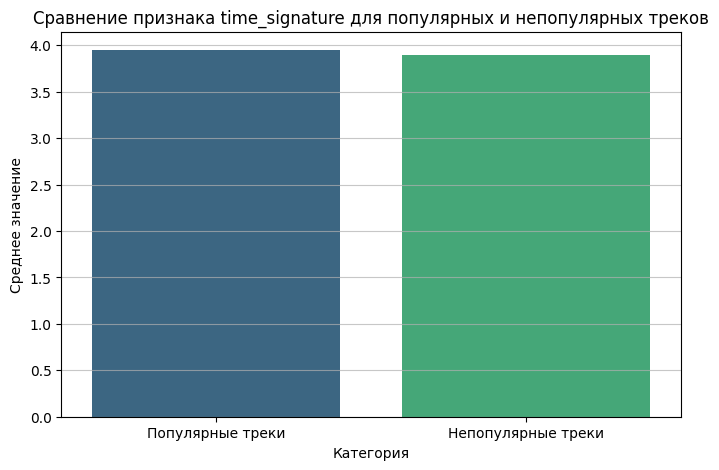

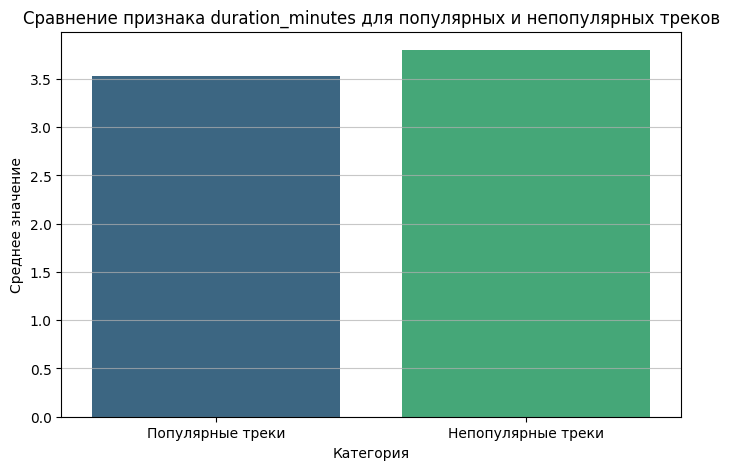

In [117]:
# Сравним признаки популярных и непопулярных треков

# Условие для группировки
popular_threshold = 80
unpopular_threshold = 20

# Выделим популярные и непопулярные треки
popular_tracks = df[df['popularity'] > popular_threshold]
unpopular_tracks = df[df['popularity'] < unpopular_threshold]

# Выведем размер выборок
print(f"Популярные треки: {len(popular_tracks)}")
print(f"Непопулярные треки: {len(unpopular_tracks)}")

# Сравним средние значения числовых признаков
mean_popular = popular_tracks[numerical_features].mean()
mean_unpopular = unpopular_tracks[numerical_features].mean()

# Соберем данные в одну таблицу
comparison_df = pd.DataFrame({
    "Популярные треки": mean_popular,
    "Непопулярные треки": mean_unpopular
})

# Выведем таблицу с результатами
print(comparison_df)

# Визуализация различий (отдельные графики для каждого признака)
for feature in comparison_df.index:
    plt.figure(figsize=(8, 5))
    sns.barplot(
        x=comparison_df.columns, 
        y=comparison_df.loc[feature], 
        palette='viridis'
    )
    plt.title(f'Сравнение признака {feature} для популярных и непопулярных треков')
    plt.ylabel('Среднее значение')
    plt.xlabel('Категория')
    plt.grid(axis='y', alpha=0.7)
    plt.show()


### Можно сделать вывод:
**Danceability, Energy, Loudness и Valence** оказывают сильное влияение на популярность

Danceability: Популярные треки более танцевальные (0.66) по сравнению с непопулярными (0.58)

Energy: Энергичность выше у популярных треков (0.68 против 0.64)

Loudness: Громкость у популярных треков выше (-6.1 дБ против -8.4 дБ)

Valence: Популярные треки имеют чуть более позитивный настрой (0.51 против 0.49)

Acousticness: Популярные треки менее акустичны (0.19 против 0.30)

Instrumentalness: Инструментальные треки редко становятся популярными (0.03 против 0.20)




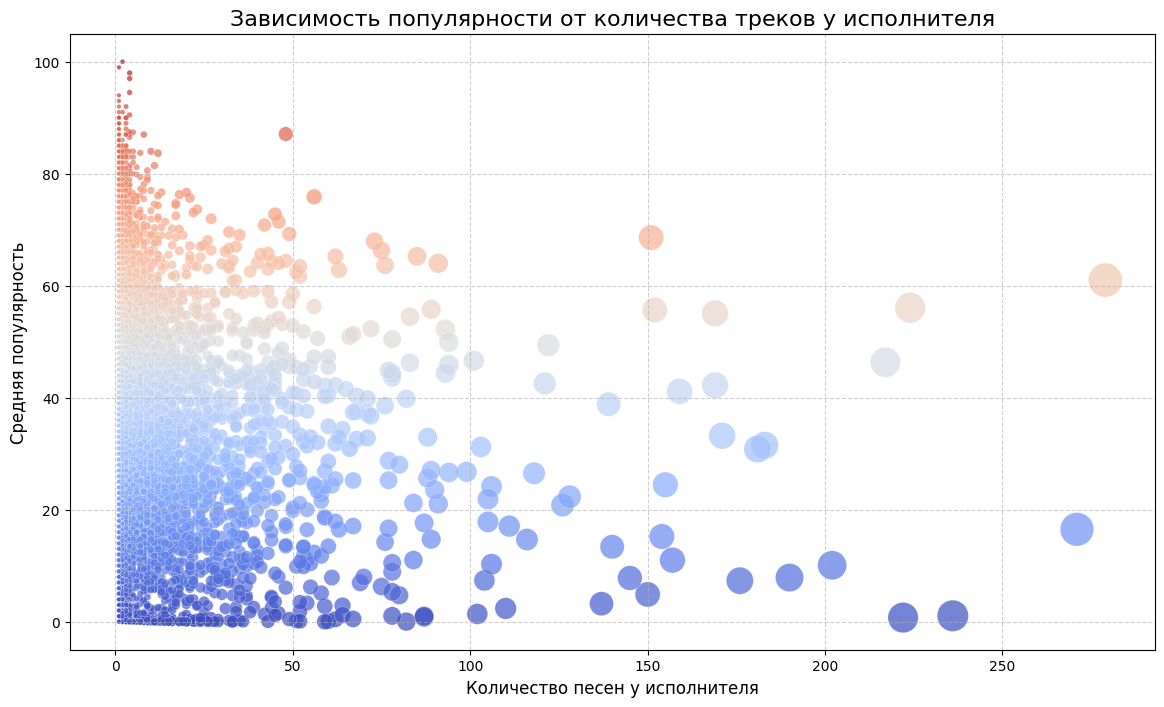

In [118]:
### Отобразим зависимость популярности от количества треков у исполнителя

# Считаем количество песен у каждого исполнителя
artist_song_count = df['artists'].value_counts()

# Для каждого трека присвоим количество песен исполнителя
df['artist_song_count'] = df['artists'].map(artist_song_count)

# Рассчитаем среднюю популярность каждого исполнителя
mean_artist_popularity = df.groupby('artists')['popularity'].mean()

plt.figure(figsize=(14, 8))

# Построим диаграмму рассеяния по популярности и с размером точек по количеству песен
sns.scatterplot(x=artist_song_count, 
                y=mean_artist_popularity, 
                hue=mean_artist_popularity, 
                size=artist_song_count,
                sizes=(10, 600),
                palette='coolwarm',
                alpha=0.7,
                edgecolor='w',
                legend=None)

plt.title('Зависимость популярности от количества треков у исполнителя', fontsize=16)
plt.xlabel('Количество песен у исполнителя', fontsize=12)
plt.ylabel('Средняя популярность', fontsize=12)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.grid(True, linestyle='--', alpha=0.6)

plt.show()

# Удаляем созданный признак
df = df.drop(['artist_song_count'], axis=1)

### Вывод: чем больше песен у автора, тем выше средняя популярность его треков

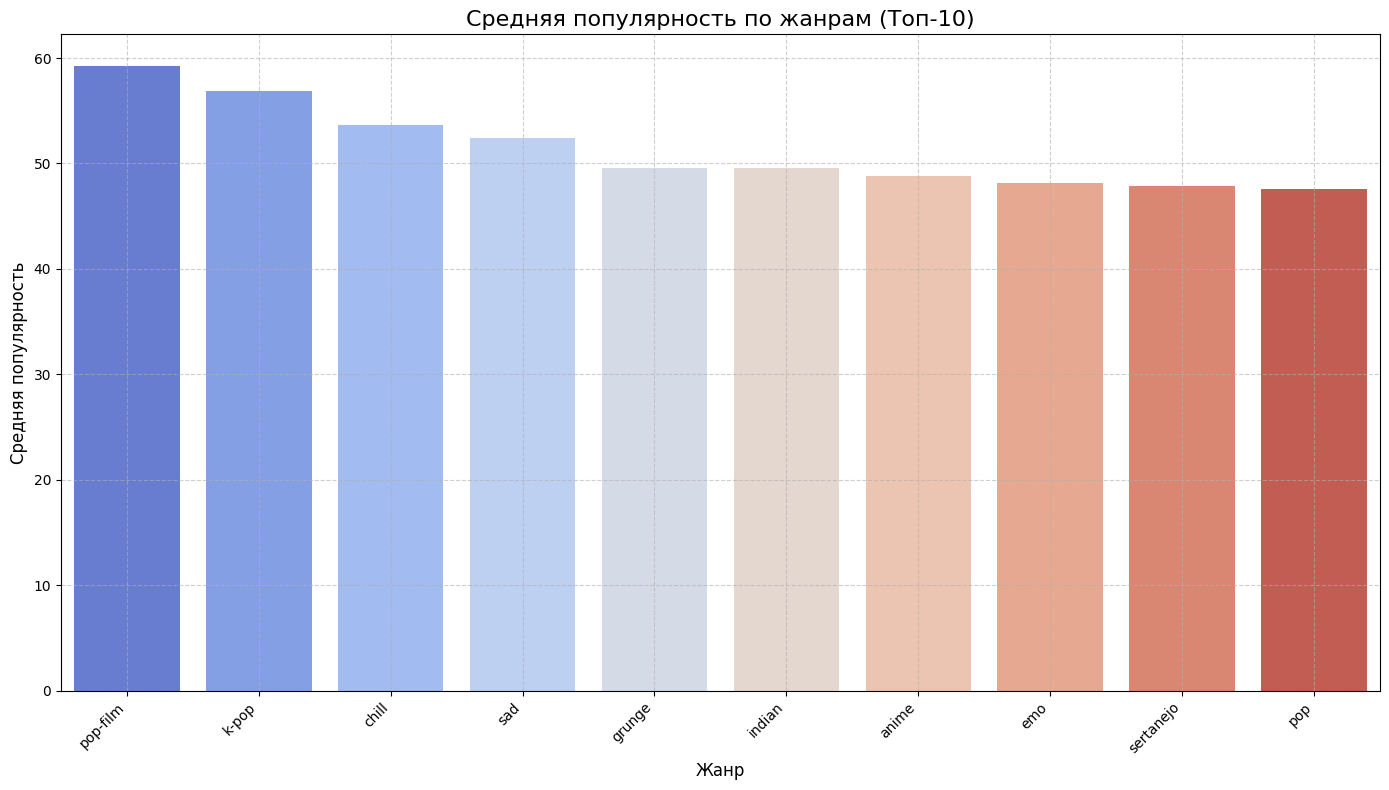

In [119]:
# Зависимость популярности от жанра трека

# Сгруппируем по жанрам и вычислим среднюю популярность для каждого жанра
genre_popularity = df.groupby('track_genre')['popularity'].mean().sort_values(ascending=False)

# Отберем топ-10 жанров с самой высокой средней популярностью
top_genres = genre_popularity.head(10)

# Визуализируем зависимость популярности от жанра для топ жанров
plt.figure(figsize=(14, 8))

sns.barplot(x=top_genres.index, y=top_genres.values, palette='coolwarm')

plt.title('Средняя популярность по жанрам (Топ-10)', fontsize=16)
plt.xlabel('Жанр', fontsize=12)
plt.ylabel('Средняя популярность', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

### Вывод: 
Популярность треков распределена относительно равномерно между жанрами, с небольшими отклонениями. Есть лидеры (pop punk, K-pop) и чуть менее популярные жанры (soundscape, emo), но в целом значения не слишком разнятся

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


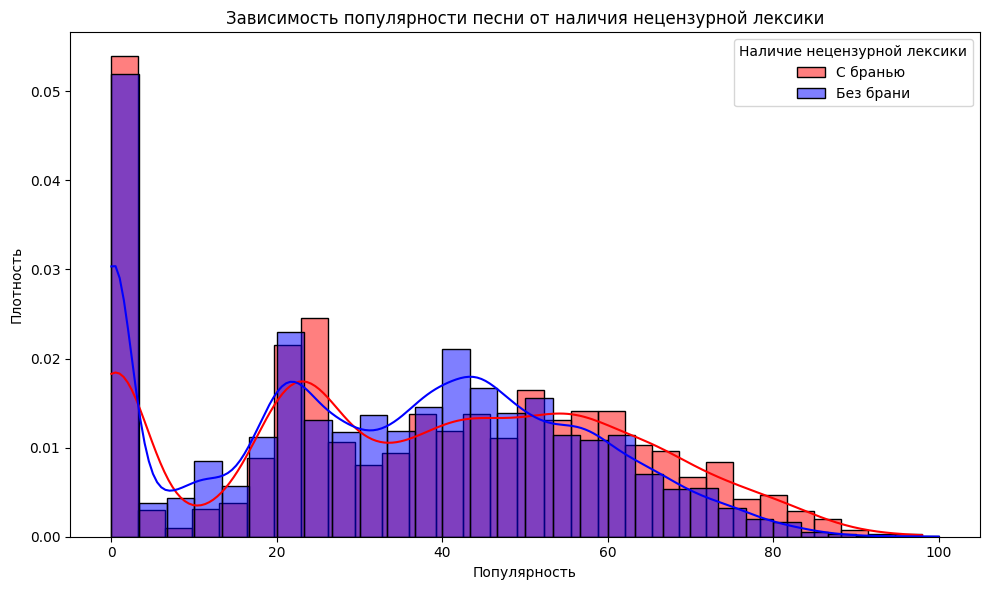

In [120]:
# Зависимость популярности песни от наличия нецензурной лексики

plt.figure(figsize=(10, 6))
sns.histplot(df[df['explicit'] == True]['popularity'], kde=True, color='red', label='С бранью', bins=30, stat="density")
sns.histplot(df[df['explicit'] == False]['popularity'], kde=True, color='blue', label='Без брани', bins=30, stat="density")
plt.title('Зависимость популярности песни от наличия нецензурной лексики')
plt.xlabel('Популярность')
plt.ylabel('Плотность')
plt.legend(title='Наличие нецензурной лексики')
plt.tight_layout()
plt.show()

## Вывод: песни с нецензурной лексикой и без неё имеют примерно схожий уровень популярности

## Добавим новые признаки

In [121]:
# Количество песен автора

artist_song_counts = df['artists'].value_counts()
df['artist_song_counts'] = df['artists'].map(lambda artist: artist_song_counts[artist])

In [122]:
# Признак, отражающий эмоциональную насыщенность трека
# Высокие значения показывают эмоционально яркие и энергичные композиции

df['emotional_intensity'] = df['valence'] * df['loudness']

In [123]:
# Категории энергичности

df['energy_category'] = pd.cut(df['energy'], bins=[0, 0.3, 0.6, 1], labels=['Low', 'Moderate', 'High'])

# low - низкая: от 0 до 0.3 (спокойные, расслабляющие)
# moderate - умеренная: от 0.3 до 0.6 (средняя энергия, подходящие для спокойных активностей)
# high - высокая: от 0.6 до 1 (энергичные, танцевальные)

In [124]:
# Категории танцевальности

df['danceability_category'] = pd.cut(df['danceability'], bins=[0,0.3,0.7,1],labels=['low','moderate','high'])

# low - низкая: от 0 до 0.3 (спокойные, медленные)
# moderate - умеренная: от 0.3 до 0.7 (умеренные ритмы)
# high - высокая: от 0.7 до 1 (энергичные танцевальные треки)

In [125]:
# Признак отражает, насколько энергичными являются треки с живым исполнением

df['liveness_energy'] = df['liveness'] * df['energy']

In [126]:
# Признак, сочетающий громкость и энергичность трека
# Высокие значения могут указывать на мощные, энергичные композиции

df['loudness_energy'] = pow(df['loudness'], 2) * df['energy']

In [127]:
# Признак, который оценивает сложность акустической составляющей трека

df['acoustic_complexity'] = df['acousticness'] * df['instrumentalness']

In [128]:
# Удаляем числовые признаки, для которых уже созданы категориальные аналоги

df = df.drop(['danceability', 'energy', 'valence'], axis=1)
df.columns.tolist()

# Преобразуем категорильные признаки

numerical_features = df.select_dtypes(include=['number','float64','int64']).columns.tolist()
categorical_features = df.select_dtypes(include=['object','category']).columns.tolist()

# Преобразуем все категориальные столбцы в числовой формат
for col in categorical_features:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

# Проверяем типы данных
df.dtypes

artists                    int64
album_name                 int64
popularity                 int64
explicit                    bool
key                        int64
loudness                 float64
mode                       int64
speechiness              float64
acousticness             float64
instrumentalness         float64
liveness                 float64
tempo                    float64
time_signature             int64
track_genre                int64
duration_minutes         float64
artist_song_counts         int64
emotional_intensity      float64
energy_category            int64
danceability_category      int64
liveness_energy          float64
loudness_energy          float64
acoustic_complexity      float64
dtype: object

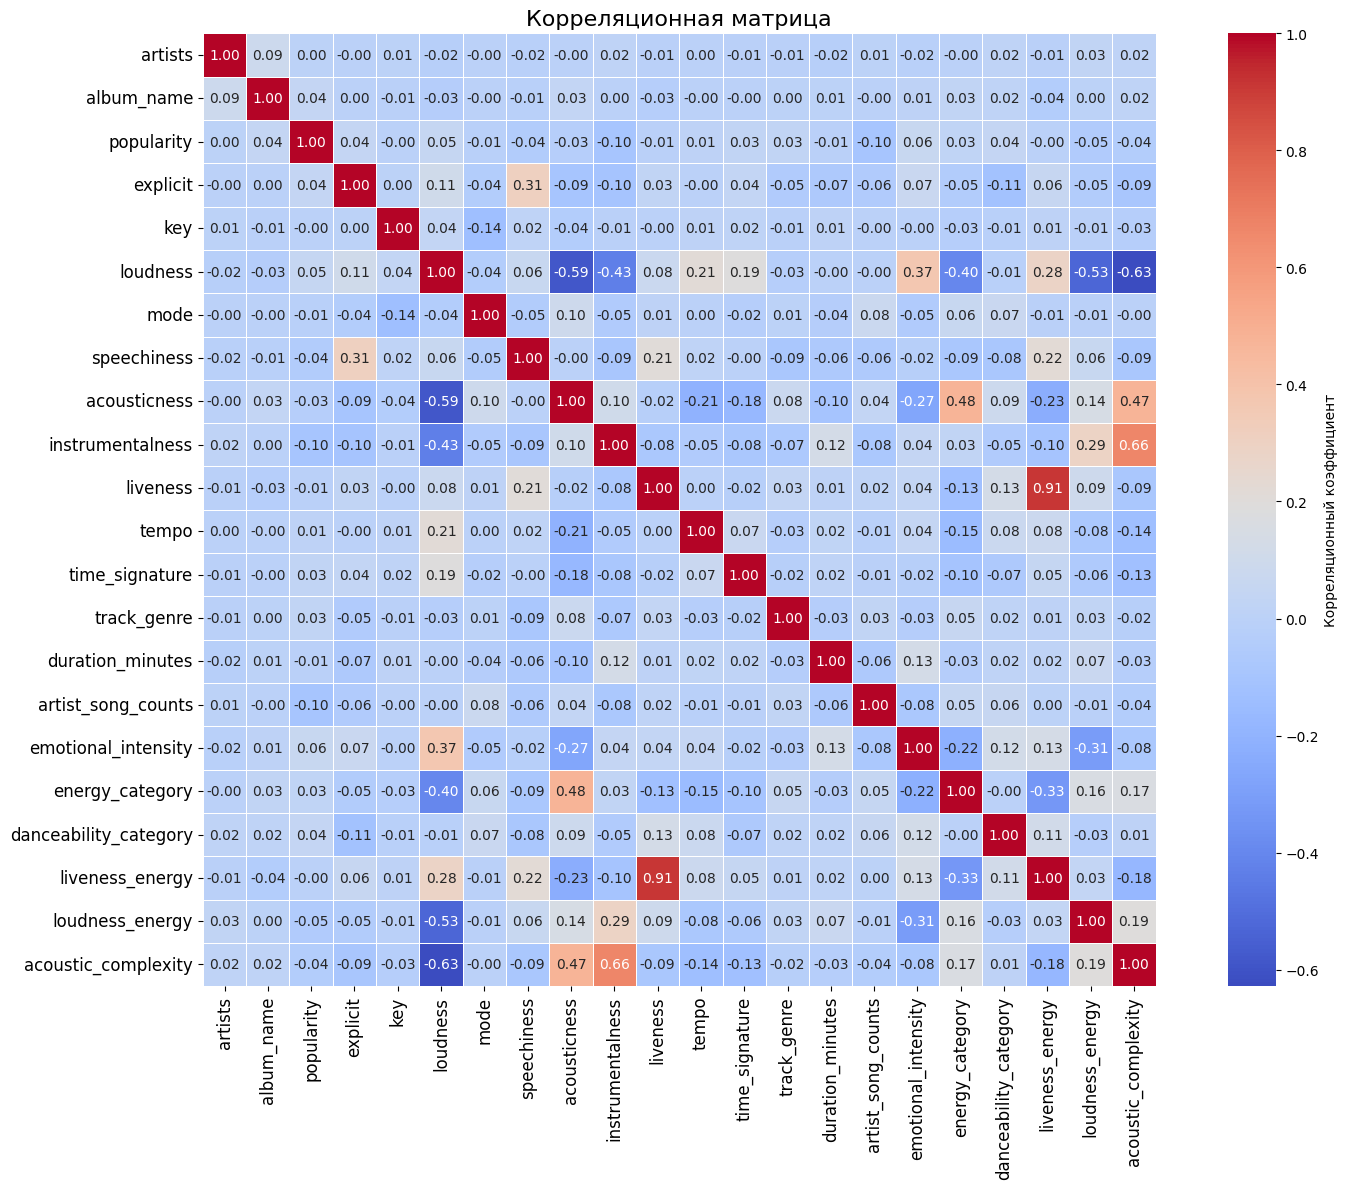

popularity               1.000000
emotional_intensity      0.064209
loudness                 0.050423
explicit                 0.044082
album_name               0.042479
danceability_category    0.039934
track_genre              0.032692
time_signature           0.031073
energy_category          0.026481
tempo                    0.013205
artists                  0.003613
key                     -0.003853
liveness_energy         -0.004552
liveness                -0.005387
duration_minutes        -0.007090
mode                    -0.013931
acousticness            -0.025472
acoustic_complexity     -0.041292
speechiness             -0.044927
loudness_energy         -0.053183
instrumentalness        -0.095139
artist_song_counts      -0.095369
Name: popularity, dtype: float64


In [129]:
# Построим корреляционную матрицу

plt.figure(figsize=(16,12))
plt.title('Корреляционная матрица', fontsize=16)

correlation = df.corr()

# Создаем тепловую карту
ax = sns.heatmap(correlation, 
                 annot=True, 
                 fmt='.2f', 
                 cmap='coolwarm', 
                 cbar_kws={'label': 'Корреляционный коэффициент'}, 
                 linewidths=0.5, 
                 linecolor='white', 
                 square=True)

# Поворот меток для лучшей читаемости
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=12)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=12)

plt.tight_layout()
plt.show()

# Выводим корреляцию всех признаков с популярностью
popularity_corr = correlation['popularity'].sort_values(ascending=False)
print(popularity_corr)

## Эксперементы с моделями

## Вывод

Большинство признаков имеют слабое или очень слабое влияние на популярность. Те, что имеют наиболее выраженные отрицательные корреляции, такие как instrumentalness и artist_song_counts, могут быть полезными для анализа, так как их влияние более заметно

Однако корреляционная матрица показывает только линейные зависимости. Это ограничивает точность оценки влияния признаков на популярность, поскольку реальные зависимости могут быть нелинейными или более сложными


In [130]:
# Нормализация данных

# Выбираем числовые признаки для масштабирования, исключая целевую
numerical_features = df.select_dtypes(include=['number']).columns.tolist()
numerical_features.remove('popularity')

X = df[numerical_features]
y = df['popularity']

# Разделим данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Масштабируем данные с помощью StandardScaler
standard_scaler = StandardScaler()
X_train_standard = standard_scaler.fit_transform(X_train)
X_test_standard = standard_scaler.transform(X_test)

In [131]:
# Функция для оценки модели

def calculate_metrics(y_true, y_pred):
    # Метрики качества
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)

    # Выводим результаты
    print(f"MAE: {mae}")
    print(f"MSE: {mse}")
    print(f"RMSE: {rmse}")
    print(f"R2: {r2}")


## Описание метрик:

- MAE (Mean Absolute Error): средняя абсолютная ошибка. Показывает, насколько в среднем предсказания модели отличаются от реальных значений. Чем меньше, тем лучше
- MSE (Mean Squared Error): среднеквадратичная ошибка. Усиливает влияние крупных ошибок. Полезно, если важно минимизировать значительные отклонения
- RMSE (Root Mean Squared Error): квадратный корень из MSE. Выражается в тех же единицах, что и целевая переменная, удобен для интерпретации, оценки и анализа
- R2 (R-Squared): коэффициент детерминации. Показывает, какая доля дисперсии объясняется моделью (значения от 0 до 1). Чем ближе к 1, тем лучше

## Модель

In [132]:
# Создадим модель

def create_model():
    model = keras.Sequential([
        layers.Input(shape=(X_train.shape[1],)),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.3),
        layers.Dense(64, activation='relu'),
        layers.Dropout(0.3),
        layers.Dense(32, activation='relu'),
        layers.Dense(1)
    ])

    # Компиляция модели с оптимизатором, функцией потерь и метриками
    model.compile(optimizer=Adam(learning_rate=1e-4), loss='mse', metrics=['mse', 'mae'])
    
    return model

model = create_model()

model.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 128)            │         2,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,057 (51.00 KB)

 Trainable params: 13,057 (51.00 KB)

 Non-trainable params: 0 (0.00 B)

In [133]:
# Обучим модель на тренировочных данных

history = model.fit(X_train_standard, y_train, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 1022.0394 - mae: 25.7832 - mse: 1022.0394 - val_loss: 492.7592 - val_mae: 18.3858 - val_mse: 492.7592
Epoch 2/100
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 515.1005 - mae: 18.7465 - mse: 515.1005 - val_loss: 486.2838 - val_mae: 18.2569 - val_mse: 486.2838
Epoch 3/100
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 507.3989 - mae: 18.6416 - mse: 507.3989 - val_loss: 477.2011 - val_mae: 18.0373 - val_mse: 477.2011
Epoch 4/100
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 499.8822 - mae: 18.4403 - mse: 499.8822 - val_loss: 472.5424 - val_mae: 17.9487 - val_mse: 472.5424
Epoch 5/100
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 490.5582 - mae: 18.2875 - mse: 490.5582 - val_loss: 469.8003 - val_mae: 17.8762 - val_mse: 469.8003
Epoch 6/100
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 484.0853 - mae: 18.1511 - mse: 484.0853 - val_loss: 468.8453 - val_mae: 17.8655 - val_mse: 468.8453
Epoch 7/100
2280/228

### Вывод:
Обучение модели демонстрирует стабильное снижение метрик как на тренировочной, так и на валидационной выборках, что подтверждает улучшение качества предсказаний. Однако снижение метрик происходит достаточно медленно

При этом разница между тренировочным и валидационным loss остаётся небольшой, что говорит о низком риске переобучения

In [134]:
# Оценка модели

y_pred_net = model.predict(X_test_standard)

calculate_metrics(y_test, y_pred_net)

713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
MAE: 16.6015820225289
MSE: 419.2417949811284
RMSE: 20.475394867526447
R2: 0.15043964721885894


713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━

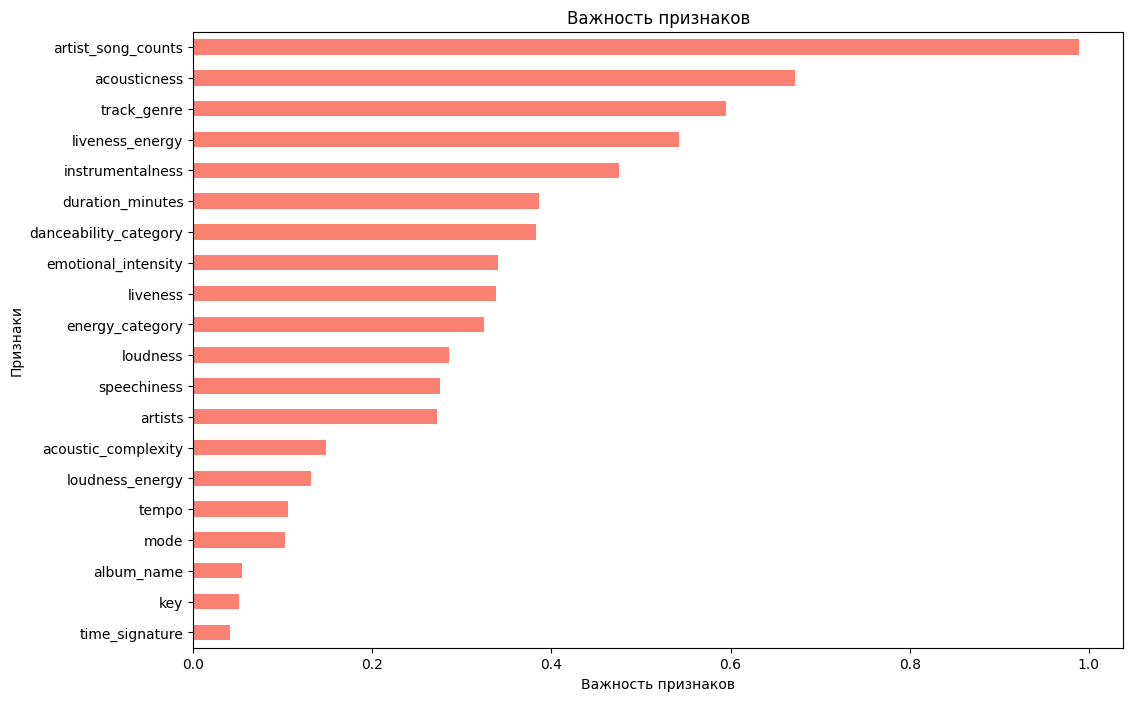

In [146]:
# Оценка важности признаков
# Необходимо для того, чтобы понять, какие признаки наиболее важны для предсказаний модели

result = permutation_importance(model, X_test_standard, y_test, n_repeats=10, random_state=40, scoring='neg_mean_absolute_error')

# Среднее значение важности признаков  
importances = pd.Series(result.importances_mean, index=X.columns)

# Сортировка и визуализация
importances.sort_values().plot(kind='barh', figsize=(12, 8), color='salmon')
plt.title('Важность признаков')
plt.xlabel('Важность признаков')
plt.ylabel('Признаки')

plt.show()

# Одними из самых важных признаков оказались artist_song_counts, acousticness и track_genre

### Вывод
Наиболее значимыми признаками оказались artist_song_counts, acousticness, track_genre и liveness_energy

In [147]:
# Создадим модель линейной регрессии, рассчитаем метрики

model_linear_regression = LinearRegression()

# Обучим модель
model_linear_regression.fit(X_train, y_train)

# Предсказания
y_pred_linear_regression = model_linear_regression.predict(X_test)

calculate_metrics(y_test, y_pred_linear_regression)

# Результаты показывают слабую точность модели

MAE: 18.228326193197624
MSE: 477.2014968248018
RMSE: 21.844942133702293
R2: 0.03298889365642521


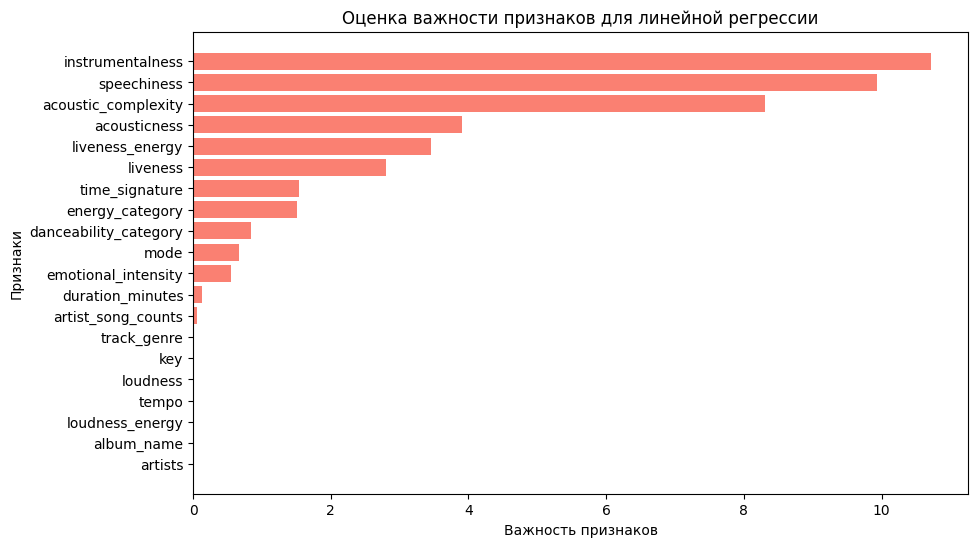

In [148]:
# Оценка важности признаков для линейной регрессии

# Извлечение коэффициентов
coefficients = model_linear_regression.coef_

# Создание DataFrame с признаками и их важностью, сортировка по важности
feature_importances_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': np.abs(coefficients)
}).sort_values(by='Importance', ascending=False)

# Визуализация
plt.figure(figsize=(10, 6))
plt.barh(feature_importances_df['Feature'], feature_importances_df['Importance'], color='salmon')
plt.xlabel('Важность признаков')
plt.ylabel('Признаки')
plt.title('Оценка важности признаков для линейной регрессии')
plt.gca().invert_yaxis()
plt.show()

# Одними из самых важных признаков для линейной регрессии оказались:
# instrumentalness, speechiness и acoustic_complexity

In [150]:
# Создадим модель случайного леса, рассчитаем метрики

# Инициализация модели со 100 деревьями
model_random_forest = RandomForestRegressor(n_estimators=100, criterion='friedman_mse',  random_state=40)

# Обучение модели на тренировочных данных
model_random_forest.fit(X_train, y_train)

# Предсказания
y_pred_random_forest = model_random_forest.predict(X_test)

# Оценка модели
calculate_metrics(y_test, y_pred_random_forest)

MAE: 9.996074220969088
MSE: 194.33337672966607
RMSE: 13.940350667385166
R2: 0.6061987758185294


<function matplotlib.pyplot.show(close=None, block=None)>

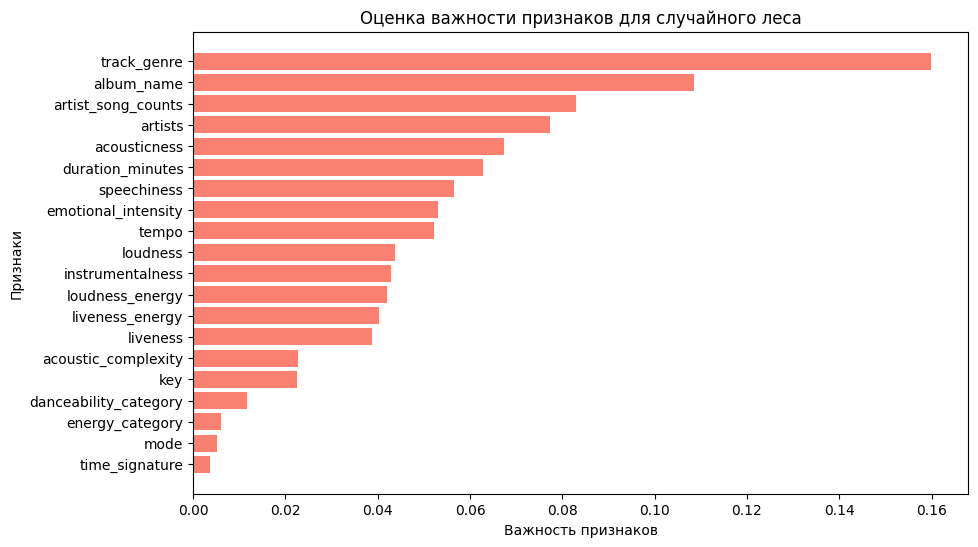

In [151]:
# Оценка важности признаков для случайного леса

# Получение важности признаков
feature_importances = model_random_forest.feature_importances_

# Создание DataFrame для удобного отображения
feature_importances_df = pd.DataFrame({
    'Feature': X.columns,  
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Визуализация важности признаков
plt.figure(figsize=(10, 6))
plt.barh(feature_importances_df['Feature'], feature_importances_df['Importance'], color='salmon')
plt.xlabel('Важность признаков')
plt.ylabel('Признаки')
plt.title('Оценка важности признаков для случайного леса')
plt.gca().invert_yaxis() 
plt.show

# Одними из самых важных признаков для случайного леса оказались:
# track_genre и album_name

In [152]:
# Создадим модель градиентного бустинга, рассчитаем метрики

model_boosting = GradientBoostingRegressor(
    n_estimators=50,
    max_depth=5,              
    criterion='friedman_mse', 
    learning_rate=0.05,
    subsample=0.9, 
    random_state=40
)

# Обучение модели
model_boosting.fit(X_train, y_train)

# Предсказания
y_pred_boosting = model_boosting.predict(X_test)

# Оценка
calculate_metrics(y_test, y_pred_boosting)

MAE: 16.352957649471843
MSE: 395.6474379550273
RMSE: 19.89088831487994
R2: 0.19825174639098686


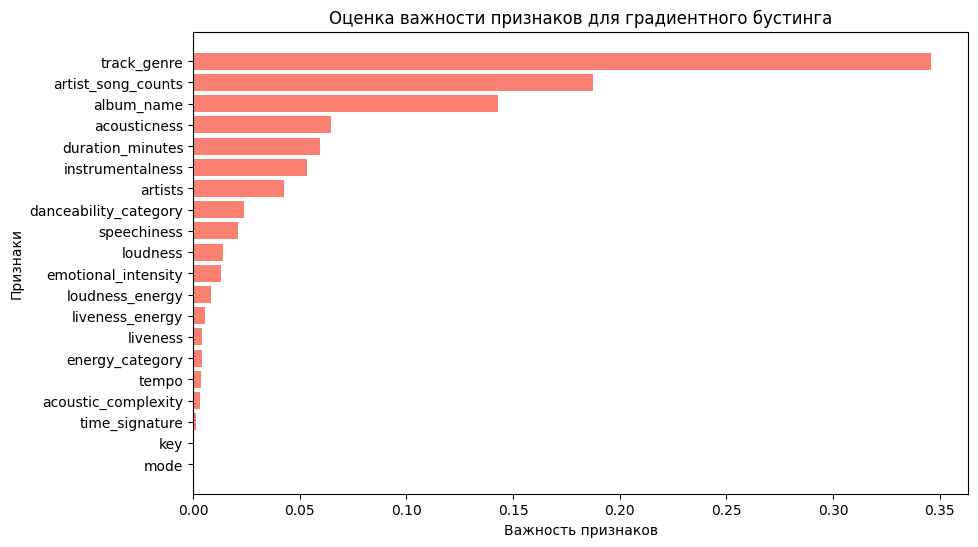

In [153]:
# Оценка важности признаков для градиентного бустинга

feature_importances = model_boosting.feature_importances_

# Создание DataFrame
feature_importances_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Визуализация
plt.figure(figsize=(10, 6))
plt.barh(feature_importances_df['Feature'], feature_importances_df['Importance'], color='salmon')
plt.xlabel('Важность признаков')
plt.ylabel('Признаки')
plt.title('Оценка важности признаков для градиентного бустинга')
plt.gca().invert_yaxis()
plt.show()

# Одними из самых важных признаков для случайного леса оказались:
# track_genre, artist_song_counts и album_name

### Сравнение метрик моделей

In [154]:
# Нейронная сеть
print('Нейронная сеть:')
calculate_metrics(y_test, y_pred_net)

# Линейная регрессия
print('Линейная регрессия:')
calculate_metrics(y_test, y_pred_linear_regression)

# Случайный лес
print('Случайный лес:')
calculate_metrics(y_test, y_pred_random_forest)

# Градиентный бустинг
print('Градиентный бустинг:')
calculate_metrics(y_test, y_pred_boosting)

Нейронная сеть:
MAE: 16.6015820225289
MSE: 419.2417949811284
RMSE: 20.475394867526447
R2: 0.15043964721885894
Линейная регрессия:
MAE: 18.228326193197624
MSE: 477.2014968248018
RMSE: 21.844942133702293
R2: 0.03298889365642521
Случайный лес:
MAE: 9.996074220969088
MSE: 194.33337672966607
RMSE: 13.940350667385166
R2: 0.6061987758185294
Градиентный бустинг:
MAE: 16.352957649471843
MSE: 395.6474379550273
RMSE: 19.89088831487994
R2: 0.19825174639098686


### Выводы о производительности моделей на основании метрик

**Нейронная сеть**:
Результаты показывают относительно невысокую точность с MAE 16.6 и RMSE 20.48. Хотя модель и имеет некоторое объяснение вариации (0.15), её предсказания по сравнению с реальными значениями имеют среднюю точность.

**Линейная регрессия**:
Худшие результаты среди всех моделей с MAE 18.23 и RMSE 21.85, а также с низким R2 (0.03). Модель плохо объясняет вариацию целевой переменной, что указывает на её недостаточную способность обрабатывать сложные зависимости.

**Случайный лес**:
Значительно превосходит другие модели по метрикам. MAE равна 9.99, а R2 - 0.61, что говорит о хорошем качестве предсказаний, что модель хорошо объясняет вариацию целевой переменной. Результат подтверждается низким MSE и RMSE.

**Градиентный бустинг**:
Неплохие результаты с MAE 16.35 и R2 около 0.2, однако точность уступает случайному лесу. Ошибки предсказаний (MSE и RMSE) находятся в пределах, сопоставимых с результатами нейронной сети

**Вывод**:
Среди всех моделей, случайный лес показал наилучшие результаты с наиболее низкими значениями MAE, MSE и RMSE, а также наивысшим R2, что указывает на его хорошую способность делать предсказания.
Нейронная сеть и градиентный бустинг показывают схожие результаты, с невысокими значениями R2, но все же немного лучшими по сравнению с линейной регрессией. Линейная регрессия, в свою очередь, оказалась самой слабой моделью.

### Кросс валидация

In [155]:
# Установим число фолдов, оптимальное для наших данных
cv_folds = 5

# Предсказания на модели случайного леса
y_pred_cv = cross_val_predict(model_random_forest, X_train_standard, y_train, cv=cv_folds)

# Вычислим метрики для оценки качества модели после кросс-валидации
mae = mean_absolute_error(y_train, y_pred_cv)
mse = mean_squared_error(y_train, y_pred_cv)
rmse = np.sqrt(mse)
r2 = r2_score(y_train, y_pred_cv)

print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R2: {r2:.4f}")

MAE: 10.7178
MSE: 216.5457
RMSE: 14.7155
R2: 0.5656


## Вывод по результатам кросс-валидации:

Сравнение метрик на тестовых данных и результатов кросс-валидации показало, что для случайного леса значения метрик после кросс-валидации немного отличаются:

**MAE** увеличился с 9.9961 до 10.7178, что указывает на небольшое снижение точности модели при обобщении данных
**MSE** увеличился с 194.3334 до 216.5457, что подтверждает увеличение крупных ошибок при оценке на разных фолдах
**RMSE** увеличился с 13.9404 до 14.7155, подтверждая рост ошибок
**R2** снизился с 0.6062 до 0.5656, что свидетельствует о незначительном уменьшении объясняющей способности модели

### Вывод:
Метрики из кросс-валидации оказались чуть хуже, чем на тестовых данных, что свидетельствует о некоторой степени переобучения модели. Однако различия незначительны, что указывает на стабильность модели и её способность обобщать данные. Случайный лес по-прежнему остаётся лучшей моделью, демонстрируя наилучшие результаты среди всех моделей

## Вывод к работе

Был проведён анализ различных моделей ML для предсказания популярности музыкальных треков на основе их характеристик. Проведённый анализ показал значимость качественной подготовки данных и важности хорошей настройки моделей. Сравнение моделей показало, что случайный лес оказался наиболее эффективным для данной задачи. Однако предсказание результатов творчества, таких как популярность музыки, остаётся сложным из-за множества случайных и непредсказуемых факторов